In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
game_sales = pd.read_csv('top100videogamesales.csv')

In [2]:
sns.set_theme(context='notebook')

____________________________________________
_____________________
# Publisher Sales by Region
The following stacked bar chart shows the total game sales by region for the 10 most popular video game publishers between 2000 and 2015. Nintendo outsold every other publisher combined, with triple the sales of it's nearest competitor, Activision. 



<AxesSubplot:ylabel='Publishers'>

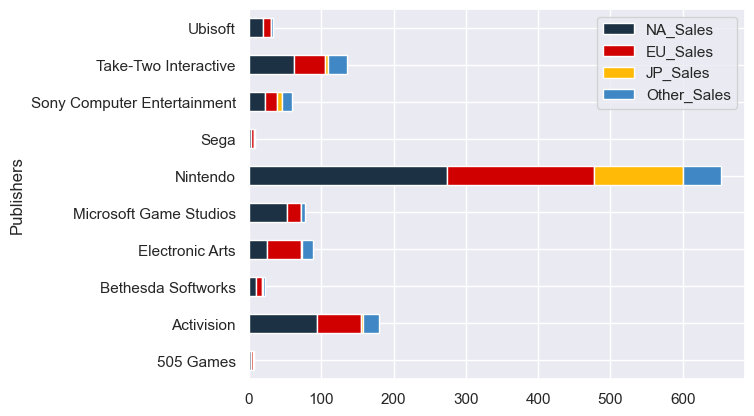

In [70]:
sales_by_region = game_sales[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
publisher_sales_by_region = sales_by_region.groupby('Publisher', as_index=False).sum()
publisher_sales_by_region.set_index('Publisher').plot(kind="barh", stacked=True, xlabel='Publishers', ylabel="Total Sales (Millions)", color=['#1C3144', '#D00000', '#FFBA08', '#3F88C5' ])

## Nintendo led global games sales by far - with the largest user base outside of North America, including Japan, the European Union, and Other locations

-------------------------
---
# Global Sales by Year


Text(0.5, 1.0, "Playstation's Share")

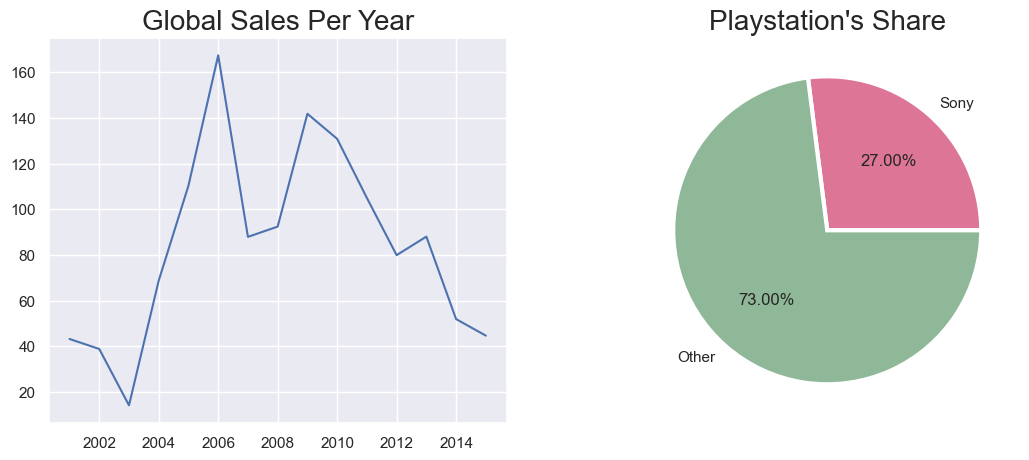

In [36]:
sales_by_year = game_sales[['Year', 'Global_Sales']].groupby('Year', as_index=False).sum()
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
# ax1 = sns.lineplot(data=sales_by_year, x="Year", y="Global_Sales", color="#063F6E").set(title="Global Sales By Year")
axs[0].plot(sales_by_year['Year'], sales_by_year['Global_Sales'])
axs[0].set_title("Global Sales Per Year", fontsize=20)

##playstation pie chart
global_sales = game_sales[['Global_Sales']].sum()
all_sales_by_publisher = game_sales[['Publisher', 'Global_Sales']].groupby('Publisher')['Global_Sales'].sum()
sony_sales = game_sales[game_sales["Platform"] == "PlayStation"]["Global_Sales"].sum()
sony_sales_percentage = int(round(sony_sales/global_sales * 100))
global_sales_percentage = 100-sony_sales_percentage
y = np.array([sony_sales_percentage, global_sales_percentage])
mylabels = ["Sony", "Other"]
sony_pie_colors = ['#DD7596', '#8EB897']
axs[1].pie(y, labels = mylabels, autopct='%1.2f%%', wedgeprops={'linewidth':3}, colors=sony_pie_colors)
axs[1].set_title("Playstation's Share", fontsize=20)


## Global Sales skyrocketed to all-time highs from 2003-2006, followed by a 2 year decline in sales. In 2009 Sales increased significantly, however from the end of 2009-2015 global sales dropped significantly

## Playstation held 27% of Global Sales during this time period.

-----------------------
____

# Distribution of global sales by genre, 'Action'

<AxesSubplot:title={'center':'Distribution of Action genre sales'}, ylabel='Frequency'>

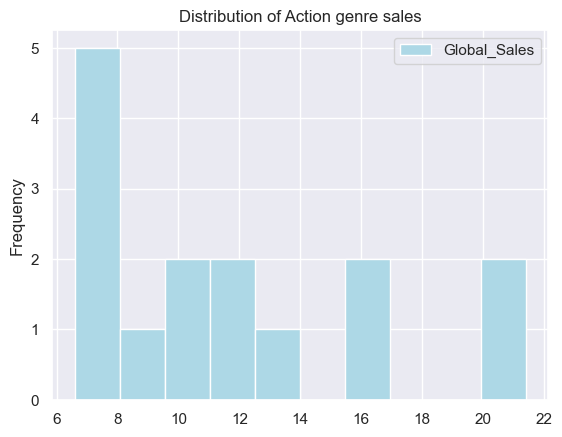

In [57]:
action_games = game_sales[game_sales['Genre'] == 'Action']
action_games[['Global_Sales']].plot(kind='hist', bins=10, title="Distribution of Action genre sales", color="lightblue")

## Video games in the "Action" genre, have a range between 6.5 million and 21 million. Most Action games typically have less than 13 million in global sales. There are three outliers at 16, 17, and 21 million, respectively. 

<AxesSubplot:title={'center':'Distribution of Shooter genre sales'}, ylabel='Frequency'>

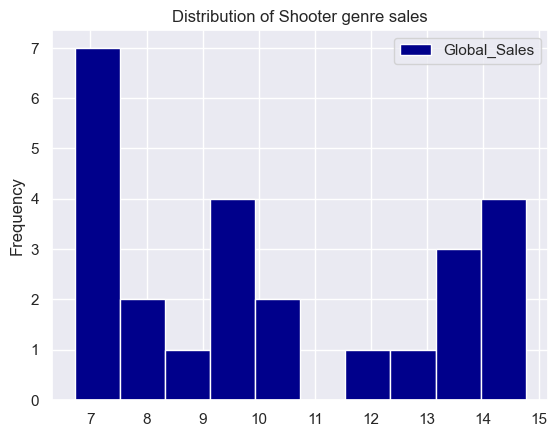

In [58]:
shooter_games = game_sales[game_sales['Genre'] == 'Shooter']
shooter_games[['Global_Sales']].plot(kind='hist', bins=10, title="Distribution of Shooter genre sales", color="darkblue")

## Global sales for video games in the "Shooter" genre range between 7 million and 14.76 million, with more than 60% of all Shooter games resulting in less than $11 million.

----
----
# Sales by Genre

Text(0.5, 1.0, 'Sales by Genre, European Union')

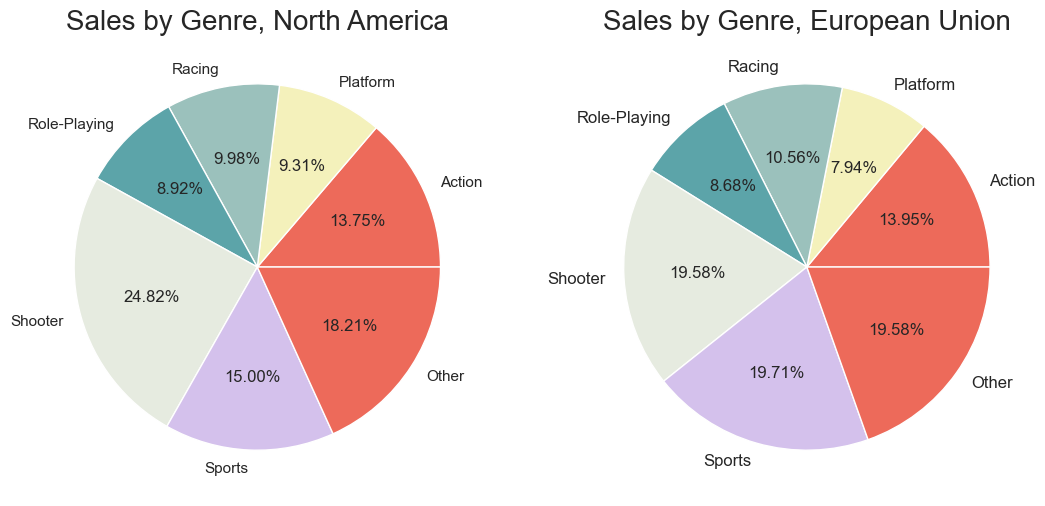

In [62]:
pie_colors = ['#ED6A5A','#F4F1BB', '#9BC1BC', '#5CA4A9', '#E6EBE0', '#D4C1EC']
na_sales = game_sales[['Genre', 'NA_Sales']].groupby('Genre', as_index=False)['NA_Sales'].sum()
na_main_genres = na_sales.loc[(na_sales['NA_Sales'] >= 15)& (na_sales['Genre'] != 'Misc')]
na_other_genres_dict = pd.DataFrame({
    "Genre": ["Other"],
    "NA_Sales": na_sales.loc[(na_sales['NA_Sales'] < 15) | (na_sales['Genre'] == 'Misc')]['NA_Sales'].sum()
})
formatted_data = pd.concat([na_main_genres, pd.DataFrame.from_dict(na_other_genres_dict)])
na_y = np.array(formatted_data['NA_Sales'])
na_labels = np.array(formatted_data['Genre'])
fig, axs = plt.subplots(1, 2, figsize=(13, 25))
axs[0].pie(na_y, labels=na_labels, autopct='%1.2f%%', colors=pie_colors)
axs[0].set_title("Sales by Genre, North America", fontsize=20)
# EU Sales
eu_sales = game_sales[['Genre', 'EU_Sales']].groupby('Genre', as_index=False)['EU_Sales'].sum()
eu_main_genres = eu_sales.loc[(eu_sales['EU_Sales'] >= 25)& (eu_sales['Genre'] != 'Misc')]
eu_other_genres_dict = pd.DataFrame({
    "Genre": ["Other"],
    "EU_Sales": eu_sales.loc[(eu_sales['EU_Sales'] < 25) | (eu_sales['Genre'] == 'Misc')]['EU_Sales'].sum()
})
eu_formatted_data = pd.concat([eu_main_genres, pd.DataFrame.from_dict(eu_other_genres_dict)])
eu_y = np.array(eu_formatted_data['EU_Sales'])
eu_labels = np.array(eu_formatted_data['Genre'])
axs[1].pie(eu_y, labels=eu_labels, autopct='%1.2f%%', textprops={'fontsize': 12}, colors=pie_colors)
axs[1].set_title("Sales by Genre, European Union", fontsize=20)

## Shooter games dominate the North American market with roughly 25% of all sales, following by Sports at 15% and action games coming in third at 13.75%.
## Sports games take the lead in the EU at 19.71%, followed by Shooter games at 19.58%, and action games come in third at 13.95%
## The Shooter and Sports Genre's take the top 2 spots in both regions. Platform games are slightly more popular than Role playing games in NA, while EU customers tend to prefer Role-playing games over platform games
"Other" category includes Genre's with less than 25 million in global sales or games that are classified as "Misc". The following genre's are accounted for in the other category: Misc, Puzzle, Simulation, and Fighting

## What genre of game is present the most in the top 100 games from 2000-2015?
### - Shooter games

In [ ]:
most_present_genre = game_sales[['Genre']].groupby('Genre', as_index=False).value_counts()
most_present_genre

---
---
# Number of games per platform


<AxesSubplot:xlabel='Platform', ylabel='Total games'>

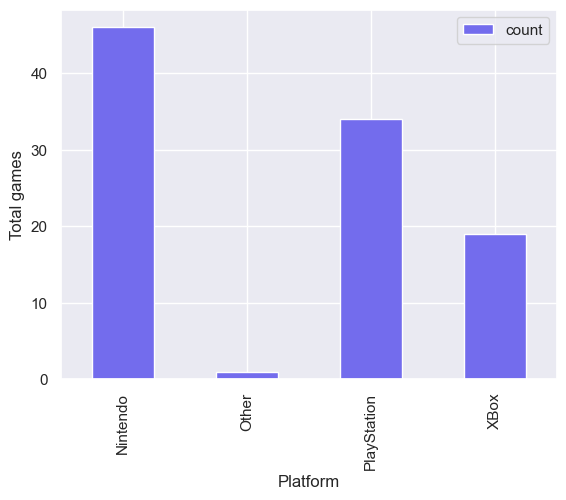

In [66]:
platform_games = game_sales[['Platform']].groupby('Platform', as_index=False).value_counts()
platform_games.set_index('Platform').plot(kind="bar", stacked=True, xlabel='Platform', ylabel="Total games", color="#736CED")

## Nintendo released more games than any other platofrm from 2000 to 2015, with 46, followed by Playstayion - 34, Xbox - 19, and Other platforms with 1 game